# Apresentação:

    Aqui vamos estudar a Regressão Logistica que é uma técnica
    estatística utilizada para modelar a relação entre uma variável
    dependente binária. Ela não trabalho no contínuo, mas sim no discreto,
    ou seja, apesar do nome Regressão, ela lida com problemas de classificação,
    onde o objetivo é atribuir uma observação a uma das duas categorias possíveis.

    Esse modelo calcula a probabilidade p de uma observação pertencer a uma
    classe binária, ou seja, um ou outro. Por definição, o limite de
    probabilidade entre as instâncias é de p = 0.5.

    predição = 1, se p > 0.5
    predição = 0, se p < 0.5

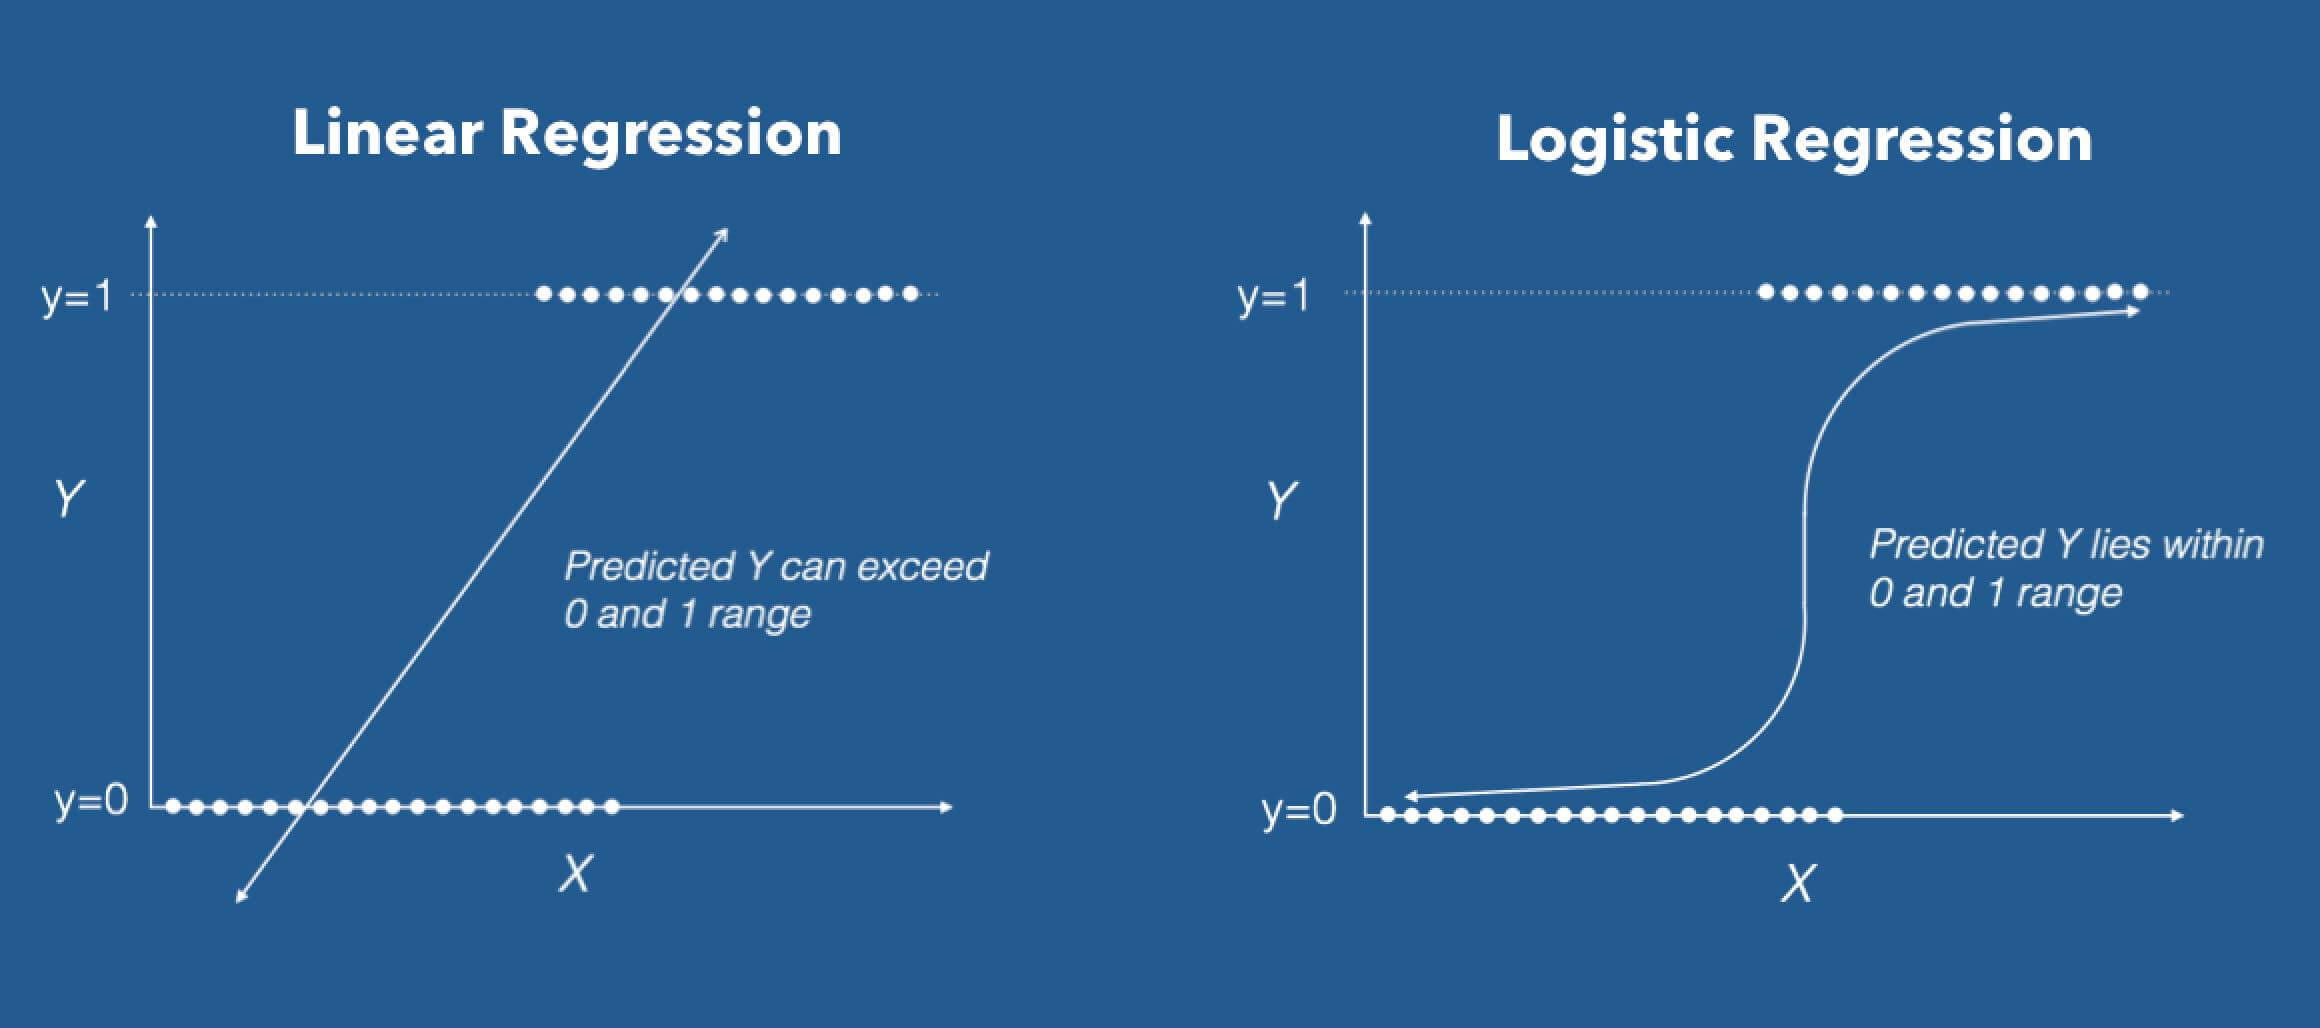

In [29]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# Checando os Datasets:
for name in dir(datasets):
  if "load" in name:
    print(name)

__loader__
load_breast_cancer
load_diabetes
load_digits
load_files
load_iris
load_linnerud
load_sample_image
load_sample_images
load_svmlight_file
load_svmlight_files
load_wine


In [31]:
diagnostic = datasets.load_breast_cancer();diagnostic.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [32]:
print(diagnostic.target.shape)
print(diagnostic.data.shape)

(569,)
(569, 30)


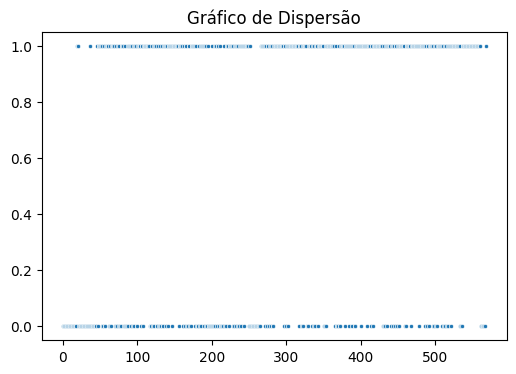

In [33]:
plt.figure(figsize=(6, 4))
plt.title('Gráfico de Dispersão')
sns.scatterplot(diagnostic.target, marker='.')
plt.show()



```
  Ou seja, temos um dataset com target discreto e entre
zero e 1 [0,1], ou seja, temos o nosso escolhido para
o estudo da regressão logística.
```



# Regressão Logistica:

    Aqui vamos estudar a Regressão Logistica que é uma técnica
    estatística utilizada para modelar a relação entre uma variável
    dependente binária. Ela não trabalho no contínuo, mas sim no discreto,
    ou seja, apesar do nome Regressão, ela lida com problemas de classificação,
    onde o objetivo é atribuir uma observação a uma das duas categorias possíveis.

    Esse modelo calcula a probabilidade p de uma observação pertencer a uma
    classe binária, ou seja, um ou outro. Por definição, o limite de
    probabilidade entre as instâncias é de p = 0.5.

    predição = 1, se p > 0.5
    predição = 0, se p < 0.5

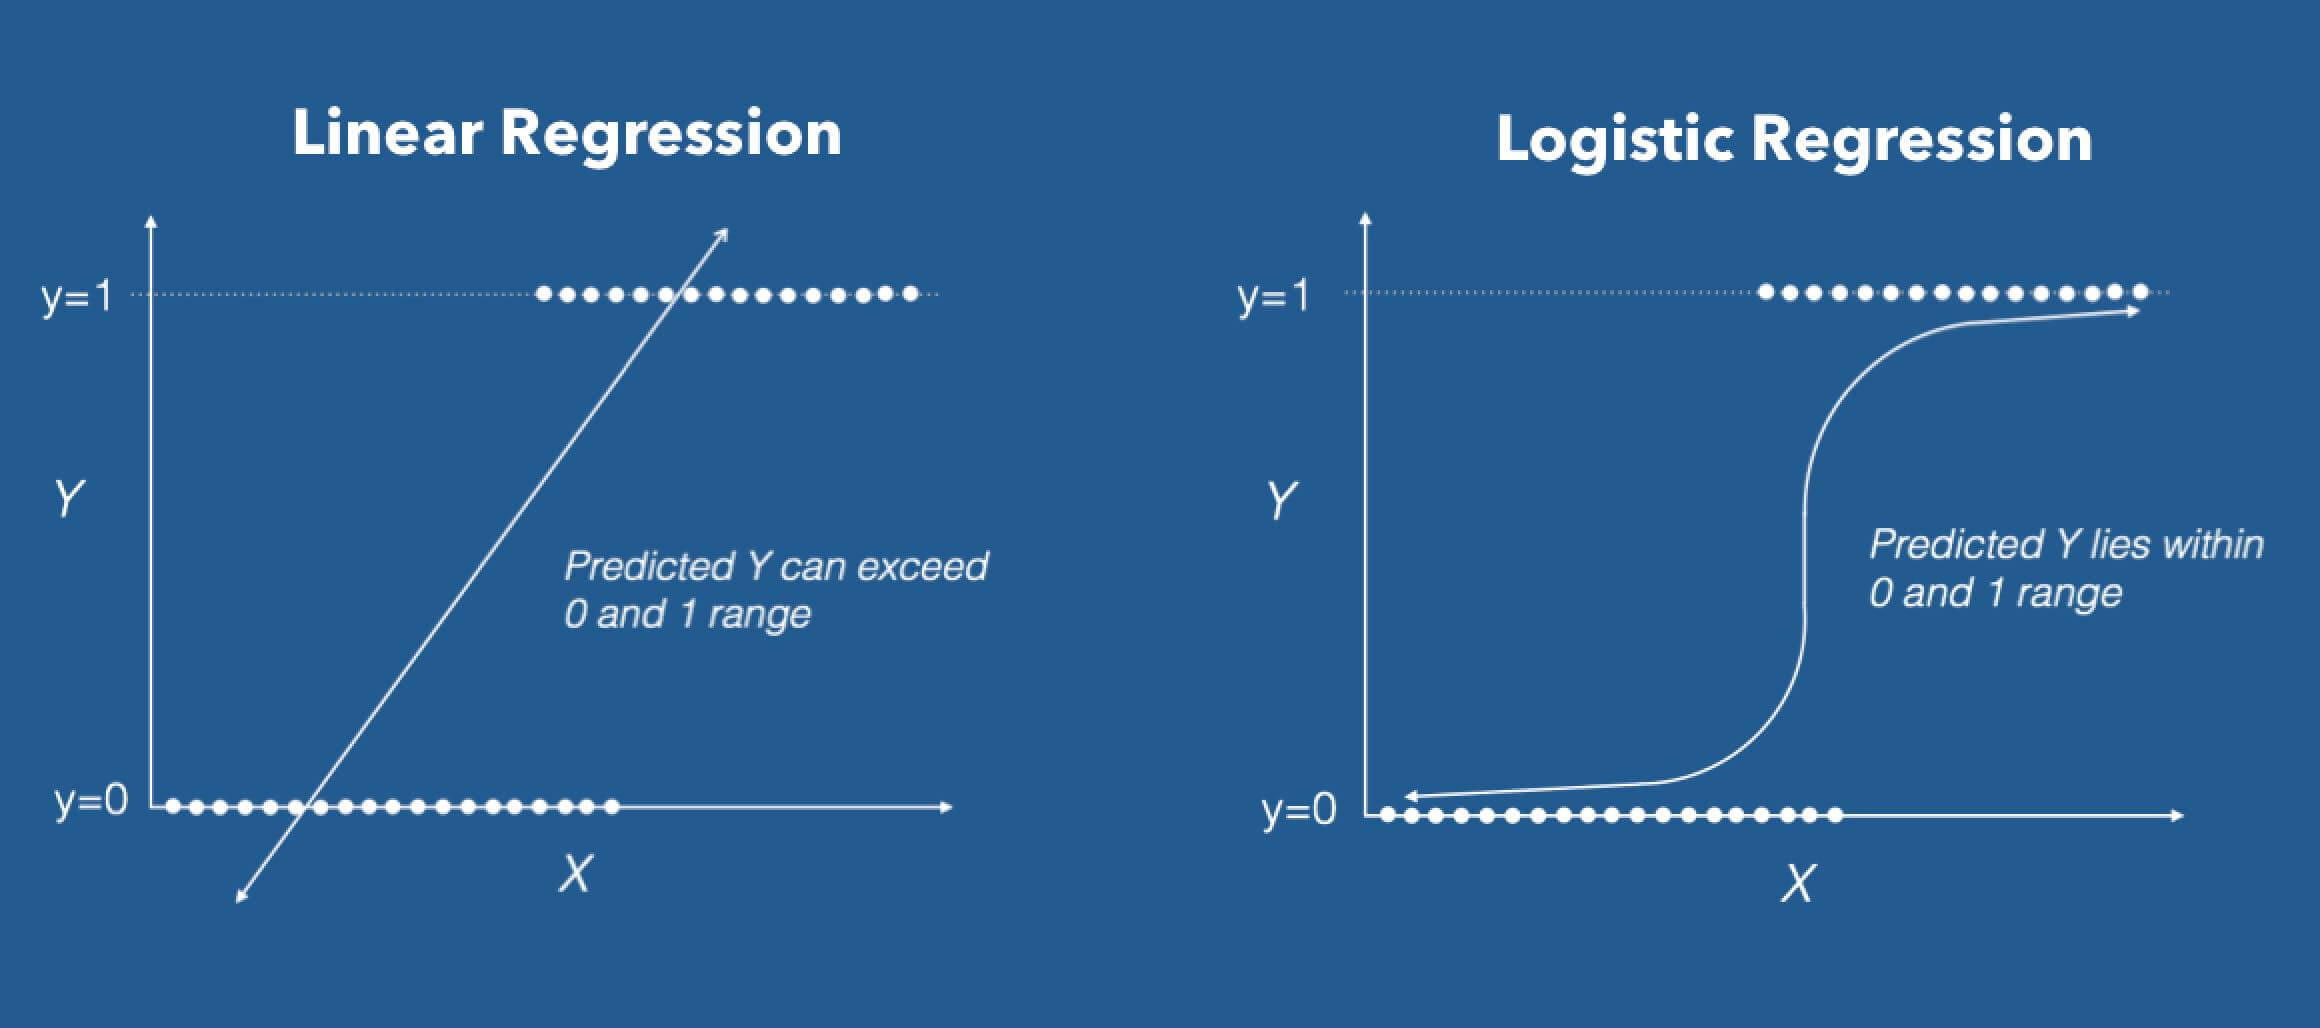



In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [35]:
X = diagnostic.data
y = diagnostic.target

In [57]:
# Construindo o Modelo com Objeto:
logreg = LogisticRegression(max_iter=1500)

# Dividindo os dados de Treino e Teste:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3,
                                                    random_state=42,stratify=y)

# Treinando o modelo:
logreg.fit(X_train,y_train)


# Predição:
y_pred = logreg.predict(X_test);y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1])

**Previsão de Probabilidades**


```
  Como já vimos, a classificação trabalha com a probabilidade
de um valor ser de uma classe. Podemos checar as probabilidades
calibradas da classificação para entender melhor carateristicas
da nosso modelo, como entender melhor a incertezado modelo, ou
analisar a calibração do modelo ou até mesmo definir um limiar
personalizado de tomada de decisão. Lembre-se que, por padrão,
o limite (treshold) de probabilidade é 0.5. Se quisermos
alterar isso, seria interessante olhar para calibração
de probabilidades do modelo.

  Para isso, usaremos o método "predict_proba". Esta função retorna
a probabilidades calibradas da classificação de acordo com cada classe
em uma matriz de vetores de teste X. No nosso caso, uma matriz
bidimensional com probabilidades para ambas as classes.
```



In [37]:
# Calibração das Probabilidades da Classificação:
y_pred_probs = logreg.predict_proba(X_test)
print(y_pred_probs[:5], y_pred_probs.shape)

[[1.59186725e-01 8.40813275e-01]
 [9.99999974e-01 2.60713293e-08]
 [9.97502272e-01 2.49772842e-03]
 [1.93351125e-03 9.98066489e-01]
 [5.14653998e-04 9.99485346e-01]] (171, 2)


In [38]:
# Checando a quantidade de linhas do X_test para saber se tá batendo com o predict_proba:
X_test.shape

(171, 30)

**Note**

```
  A predict_proba retorna as probabilidades estimadas
associadas a cada classe para cada observação no conjunto
de dados. Essa função é comumente usada em modelos de
classificação binária.

  Ou seja, a primeira trata da probabilidade do valor
observado ser 0 e ser 1. Note que a maior probabilidade
é de ele ser um, ou seja, ele foi classificado como um
pelo modelo.
```



In [39]:
# Checando as classificações e batendo com o y_pred_probs:
y_pred[:5]

array([1, 0, 0, 1, 1])

# Métricas de Mensuração:

In [40]:
# Checando a precisão do modelo:
acuracia = round(logreg.score(X_test,y_test),4)*100 # Passando para porcentagem
print(f'A acurácia do modelo é de {acuracia}%')

A acurácia do modelo é de 97.08%


**ConvergenceWarning**

```
  O ConvergenceWarning é um aviso de  problema na convergência do modelo,
ou seja, o modelo não estgá convergindo para um valor. Possiveis soluções
para resolver esse problema é checar aumentar o numero de iterações do
modelo ou mexer na escala. Para o nosso caso, um simples aumentar de
quantidade de iterações já foi o suficiente para conseguir uma boa métrica.
```



In [41]:
from sklearn.metrics import classification_report, confusion_matrix

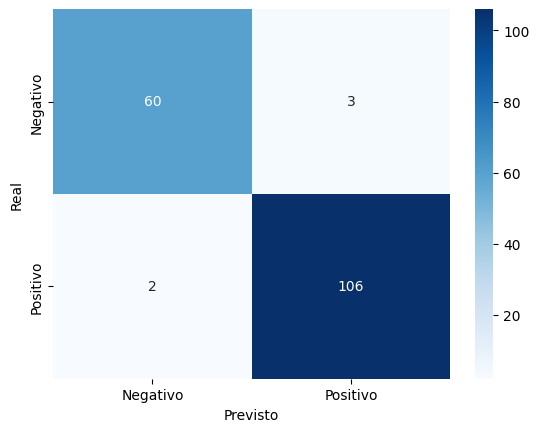

In [42]:
# Substitua 'predicoes' e 'valores_reais' pelos seus arrays numpy
cm = confusion_matrix(y_test, y_pred)

# Crie um heatmap para visualizar a matriz de confusão
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negativo', 'Positivo'], yticklabels=['Negativo', 'Positivo'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

In [43]:
confusion_matrix(y_test, y_pred)

array([[ 60,   3],
       [  2, 106]])

In [44]:
col1, col2 = confusion_matrix(y_test, y_pred)

print(f"Verdadeiros Positivos (VP): {col2[1]}")
print(f"Verdadeiros Negativos (VN): {col1[0]}")
print(f"Falsos Positivos (FP): {col1[1]}")
print(f"Falsos Negativos (FN): {col2[0]}")

Verdadeiros Positivos (VP): 106
Verdadeiros Negativos (VN): 60
Falsos Positivos (FP): 3
Falsos Negativos (FN): 2


In [45]:
def calcular_matriz_confusao(previsoes, rotulos_verdadeiros):
    VP = sum((p == 1) and (r == 1) for p, r in zip(previsoes, rotulos_verdadeiros))
    VN = sum((p == 0) and (r == 0) for p, r in zip(previsoes, rotulos_verdadeiros))
    FP = sum((p == 1) and (r == 0) for p, r in zip(previsoes, rotulos_verdadeiros))
    FN = sum((p == 0) and (r == 1) for p, r in zip(previsoes, rotulos_verdadeiros))

    return VP, VN, FP, FN

In [46]:
VP, VN, FP, FN = calcular_matriz_confusao(y_pred, y_test)

print(f"Verdadeiros Positivos (VP): {VP}")
print(f"Verdadeiros Negativos (VN): {VN}")
print(f"Falsos Positivos (FP): {FP}")
print(f"Falsos Negativos (FN): {FN}")

Verdadeiros Positivos (VP): 106
Verdadeiros Negativos (VN): 60
Falsos Positivos (FP): 3
Falsos Negativos (FN): 2


In [47]:
def acuracia_ponderada(Positivos_Verdadeiros,Negativos_Verdadeiros,Falsos_Positivos,Falsos_Negativos):
  ac_pond = (Positivos_Verdadeiros+Negativos_Verdadeiros)/(Positivos_Verdadeiros+Negativos_Verdadeiros+Falsos_Positivos+Falsos_Negativos)
  return ac_pond

In [48]:
def precisao_score(Positivos_Verdadeiros,Falsos_Positivos):
  prec = Positivos_Verdadeiros/(Positivos_Verdadeiros+Falsos_Positivos)
  return prec

In [49]:
def recall_score(Positivos_Verdadeiros,Falsos_Negativos):
  rec = Positivos_Verdadeiros/(Positivos_Verdadeiros+Falsos_Negativos)
  return rec

In [50]:
def F1_score(Positivos_Verdadeiros,Negativos_Verdadeiros,Falsos_Positivos,Falsos_Negativos):
  numerador = (precisao_score(Positivos_Verdadeiros,Falsos_Positivos)*recall_score(Positivos_Verdadeiros,Falsos_Negativos))
  denominador = (precisao_score(Positivos_Verdadeiros,Falsos_Positivos)+recall_score(Positivos_Verdadeiros,Falsos_Negativos))
  f1 = 2 * (numerador/denominador)
  return f1

In [51]:
# Checando as métricas:
acuracia = round(acuracia_ponderada(VP,VN,FP,FN),2)
precisao = round(precisao_score(VP,FP),2)
recall = round(recall_score(VP,FN),2)
F1 = round(F1_score(VP,VN,FP,FN),2)


print(f'A acurácia do modelo é de {acuracia}')
print(f'A precisão do modelo é de {precisao}')
print(f'A recall do modelo é de {recall}')
print(f'A F1_score do modelo é de {F1}')

A acurácia do modelo é de 0.97
A precisão do modelo é de 0.97
A recall do modelo é de 0.98
A F1_score do modelo é de 0.98


In [52]:
# Utilizando a biblioteca:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        63
           1       0.97      0.98      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



## Curva ROC (Caracteristica de operações do receptor):

    Vimos que o limite de probabilidade de instância entre as classes
    é 0.5, esse é o padrão do SKlearn, inclusive para outros modelos,
    como o KNN, porêm, podemos querer trabalhar com outras taxas de
    probabilidade. Nesses casos então, se faz necessário o caso
    usar a Cuva de Caracteristica de Operações do Receptor para
    visualizar como diferentes limites de probabilidade afetam as taxas
    de verdadeiros positivos e falsos positivos.

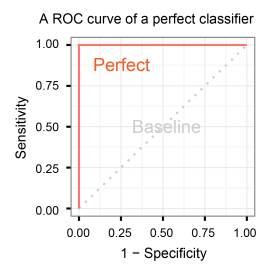

    Onde a linha tracejada representa uma predição aleatória, que adivinha
    rótulos aleatoriamente, ou seja é onde o limite não faz a menor diferença.
    Se o limite for igual a um, o modelo prevê zero para todos os dados, o que
    significa que as taxas de verdadeiros e falsos positivos são zero. Se
    variarmos o limite, obteremos uma série de diferentes taxas de falsos
    positivos e verdadeiros positivos.



In [53]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

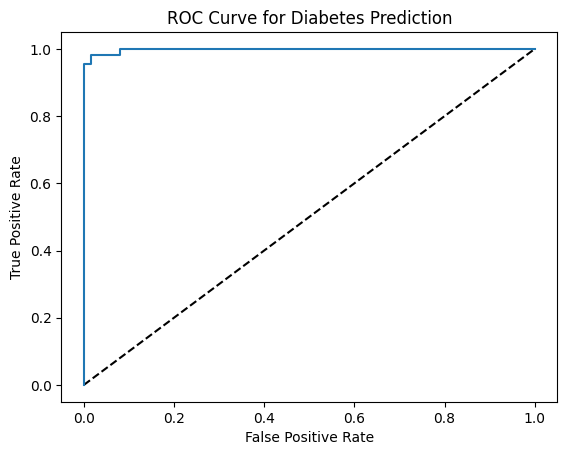

In [54]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs[:,1])

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

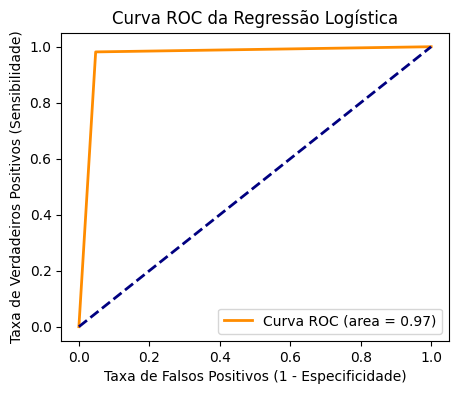

In [55]:
# Calcule a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plote a curva ROC
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Taxa de Falsos Positivos (1 - Especificidade)')
plt.ylabel('Taxa de Verdadeiros Positivos (Sensibilidade)')
plt.title('Curva ROC da Regressão Logística')
plt.legend(loc='lower right')
plt.show()


**Onde**
```
1.   fpr = falsos positivos
2.   tpr = positivos verdadeiros
3.   auc = Area Abaixo da Curva - Função que calcula
a ára do gráfico de uma curva ROC, dado dois pontos.

A área sob a curva ROC é uma métrica comum para avaliar o desempenho
de modelos de classificação binária. Ela fornece uma medida única da
capacidade discriminativa do modelo, independentemente do ponto de corte
escolhido. Quanto maior a área sob a curva (AUC), melhor o desempenho do
modelo. Em essência, quanto mais perto de 1 é esse valor, melhor o modelo.

```



In [56]:
print(roc_auc_score(y_test,y_pred_probs[:,1]))

0.9980893592004704


**Note**

```
  Note que há um fatiamento do y_pred_probs. O y_pred_probs,
é uma matriz com informação das probabilidades calibradas da
nossa classificação. A primeira coluna da matriz tratasse das
probabilidades de ser zero, a segunda, trata das probabilidades
de ser 1.

  O array y_test é unidimensional, então o array y_pred_probs,
também precisa ser. Só queremos analisar a probabilidade de ser
1, então, por isso fatia-se a matriz de modo a pegar apenas
a coluna, o vetor, de probabilidades referente a ser 1.
```

